Import Lybrary

In [26]:
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten
import json
import pickle
import os
import gc
tokenizer = Tokenizer()

In [23]:
#import os

# Mount Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

# Create a folder in the root directory
#!mkdir -p "/content/drive/MyDrive/AI/MLdata"

# Write a sample file to Google Drive
#with open('/content/drive/MyDrive/AI/MLdata/sentiment_datawords.pkl', 'wb') as f:
  #f.write('Hello, World!')

In [27]:
docs = [
		      ['I am happy', 1 ],
		      ['I am bad', 0],
					['I am proud', 1 ],
		      ['I am sad', 0],
					['I am worry', 0 ],
		      ['I am bad', 0],
					['product is good', 1 ],
		      ['product is not good', 0],
					['product is not well', 0 ],
		      ['product is not bad', 1],
					['product is not bad, I am happy for it', 1 ],
		      ['It is bad', 0],
					['It is good', 1 ],
		      ['she is bad girl', 0],
		]


Make Dataframe

In [28]:
df = pd.DataFrame(docs)
df

,0,1
0,I am happy,1
1,I am bad,0
2,I am proud,1
3,I am sad,0
4,I am worry,0
5,I am bad,0
6,product is good,1
7,product is not good,0
8,product is not well,0
9,product is not bad,1


In [29]:
X = df[0]
Y = df[1]
X

0                                I am happy
1                                  I am bad
2                                I am proud
3                                  I am sad
4                                I am worry
5                                  I am bad
6                           product is good
7                       product is not good
8                       product is not well
9                        product is not bad
10    product is not bad, I am happy for it
11                                It is bad
12                               It is good
13                          she is bad girl
Name: 0, dtype: object

In [53]:
def vocal(doc):
    tokenizer.fit_on_texts(doc)
    vocal = tokenizer.word_index
    return vocal

def sentence2int( vocal=vocal(X), sentence=None ):
    if sentence != None:
        sentence = sentence.lower()
        words = sentence.split()
        sentence2int = [(vocal[i]) for i in words if i in vocal ]
        return sentence2int
    else:
      return False


In [42]:
def dumpdata():
    pickle.dump(vocal(X), open('/content/drive/MyDrive/AI/MLdata/sentiment_datawords.pkl', 'wb'))


dumpdata()


In [43]:

filename = '/content/drive/MyDrive/AI/MLdata/sentiment_datawords.pkl'
with open(filename, 'rb') as f:
    load_sentiment_datawords = pickle.load(f)

In [45]:
len(tokenizer.word_index)

16

In [46]:
sequences = tokenizer.texts_to_sequences(X)
sequences

[[2, 3, 9],
 [2, 3, 4],
 [2, 3, 10],
 [2, 3, 11],
 [2, 3, 12],
 [2, 3, 4],
 [5, 1, 7],
 [5, 1, 6, 7],
 [5, 1, 6, 13],
 [5, 1, 6, 4],
 [5, 1, 6, 4, 2, 3, 9, 14, 8],
 [8, 1, 4],
 [8, 1, 7],
 [15, 1, 4, 16]]

In [60]:

sequences = pad_sequences(sequences,padding='post')
X_train = sequences
y_train = Y

X_test = sequences[10:]
y_test = Y[10:]

In [114]:
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten
model = Sequential()
model.add(Embedding(17,output_dim=2,input_length=9))
model.add(SimpleRNN(16,input_shape=(9,1),return_sequences=False))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 9, 2)              34        
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 16)                304       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 355
Trainable params: 355
Non-trainable params: 0
_________________________________________________________________


In [118]:

model.compile('adam','accuracy')
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
hist = model.fit( X_train, y_train, epochs=100, validation_data=(X_test,y_test) )

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.4152 - acc: 1.0000 - val_loss: 0.3503 - val_acc: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 83ms/step - loss: 0.4055 - acc: 1.0000 - val_loss: 0.3410 - val_acc: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 93ms/step - loss: 0.3958 - acc: 1.0000 - val_loss: 0.3317 - val_acc: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 71ms/step - loss: 0.3859 - acc: 1.0000 - val_loss: 0.3226 - val_acc: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 72ms/step - loss: 0.3758 - acc: 1.0000 - val_loss: 0.3135 - val_acc: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 83ms/step - loss: 0.3657 - acc: 1.0000 - val_loss: 0.3045 - val_acc: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 76ms/step - loss: 0.3554 - acc: 1.0000 - val_loss: 0.2957 - val_acc: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 84ms/step - loss: 0.3451 - acc: 1.0000

In [119]:
sentence[0] = sentence2int( vocal= load_sentiment_datawords, sentence='I am happy' )
pred = model.predict([[5, 1, 6, 4, 2, 3, 9, 14, 8],])
pred

1/1 [==============================] - 0s 142ms/step


array([[0.96585286]], dtype=float32)

Text(0, 0.5, 'Loss Fn valaues')

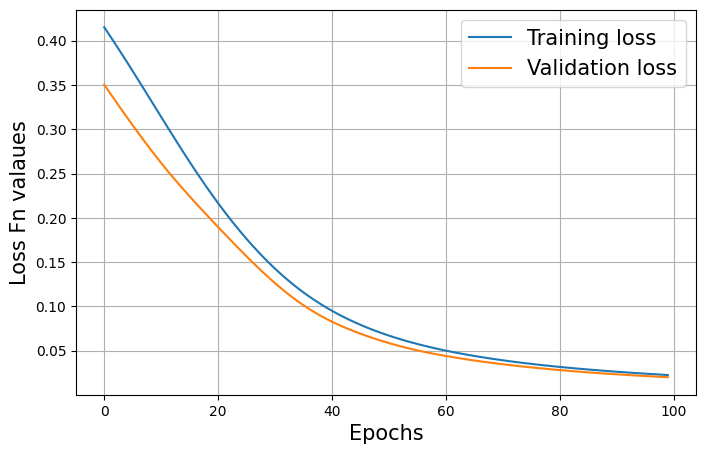

In [120]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(hist.history['loss'], label='Training loss')
plt.plot(hist.history['val_loss'], label='Validation loss')
plt.legend(fontsize=15)
plt.grid()
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss Fn valaues', fontsize=15)

Text(0, 0.5, 'Accuracy Fn valaues')

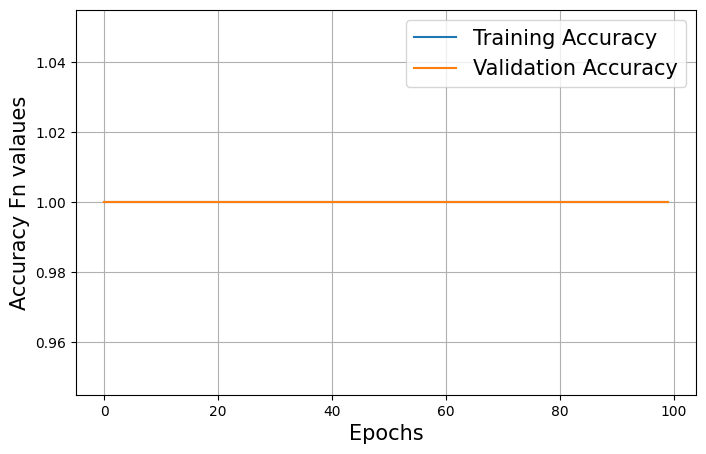

In [121]:
plt.figure(figsize=(8,5))
plt.plot(hist.history['acc'], label='Training Accuracy')
plt.plot(hist.history['val_acc'], label='Validation Accuracy')
plt.legend(fontsize=15)
plt.grid()
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy Fn valaues', fontsize=15)